## Timer log
In this part, we will create a python decorator to monitor the time taken by the execution of a function. 

- Implement a decorator that log the execution time of a function

In [9]:
import logging
import time
from functools import wraps
import logging
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)
logger.setLevel("DEBUG")
handler = logging.StreamHandler()
log_format = "%(asctime)s %(levelname)s -- %(message)s"
formatter = logging.Formatter(log_format)
handler.setFormatter(formatter)
logger.addHandler(handler)

In [10]:
# Creation of the decorater
def timed(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        logger.debug("{} ran in {}s".format(func.__name__, round(end - start, 2)))
        return result
    return wrapper

- Create 2 functions that count the number of appearances of each word in this text:
    - using a dictionary
    - using the Counter function 

In [11]:
# With dictionary

@timed
def function1_word(filename):
    counts = dict()
    words = re.findall(r'\w+', open(filename).read().lower())

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

function1_word("t8.shakespeare.txt")

2023-01-05 16:41:04,888 DEBUG -- function1_word ran in 0.81s
2023-01-05 16:41:04,888 DEBUG -- function1_word ran in 0.81s


{'this': 6853,
 'is': 9784,
 'the': 27660,
 '100th': 1,
 'etext': 245,
 'file': 20,
 'presented': 18,
 'by': 4476,
 'project': 251,
 'gutenberg': 236,
 'and': 26784,
 'in': 11123,
 'cooperation': 2,
 'with': 8016,
 'world': 905,
 'library': 232,
 'inc': 224,
 'from': 2654,
 'their': 2077,
 'of': 18191,
 'future': 17,
 'shakespeare': 268,
 'cdroms': 1,
 'often': 124,
 'releases': 1,
 'etexts': 8,
 'that': 11549,
 'are': 3894,
 'not': 8740,
 'placed': 11,
 'public': 57,
 'domain': 4,
 'has': 388,
 'certain': 176,
 'copyright': 228,
 'implications': 1,
 'you': 13860,
 'should': 1580,
 'read': 207,
 'electronic': 443,
 'version': 222,
 'complete': 246,
 'works': 249,
 'william': 349,
 '1990': 221,
 '1993': 221,
 'provided': 253,
 'illinois': 223,
 'benedictine': 223,
 'college': 226,
 'permission': 225,
 'machine': 223,
 'readable': 224,
 'copies': 446,
 'may': 1876,
 'be': 7130,
 'distributed': 443,
 'so': 5282,
 'long': 704,
 'as': 5975,
 'such': 1622,
 '1': 309,
 'for': 8341,
 'your': 6

In [13]:
# With Counter function

@timed
def function2_word(filename):
  words = re.findall(r'\w+', open(filename).read().lower())
  word_counter = Counter(words)
  with open(filename) as file:
      for line in file:
          line_letters = [
              char for char in line.lower() if char.isalpha()
          ]
          word_counter.update(Counter(line_letters))
  return word_counter

function2_word("t8.shakespeare.txt")

2023-01-05 16:42:36,330 DEBUG -- function2_word ran in 2.85s
2023-01-05 16:42:36,330 DEBUG -- function2_word ran in 2.85s


Counter({'this': 6853,
         'is': 9784,
         'the': 27660,
         '100th': 1,
         'etext': 245,
         'file': 20,
         'presented': 18,
         'by': 4476,
         'project': 251,
         'gutenberg': 236,
         'and': 26784,
         'in': 11123,
         'cooperation': 2,
         'with': 8016,
         'world': 905,
         'library': 232,
         'inc': 224,
         'from': 2654,
         'their': 2077,
         'of': 18191,
         'future': 17,
         'shakespeare': 268,
         'cdroms': 1,
         'often': 124,
         'releases': 1,
         'etexts': 8,
         'that': 11549,
         'are': 3894,
         'not': 8740,
         'placed': 11,
         'public': 57,
         'domain': 4,
         'has': 388,
         'certain': 176,
         'copyright': 228,
         'implications': 1,
         'you': 13860,
         'should': 1580,
         'read': 207,
         'electronic': 443,
         'version': 222,
         'complete': 246,
       

- What is the time taken for both implementations for this task? Why is it different? What are the specificities of the underlying data structures (especially the dictionary)?

Answer : We can observe that it is faster with the dictionary than with the counter function. Indeed, we have a time of 0.81 seconds for the function with the dictionary and 2.85 seconds for the counter function.  It is almost twice as fast with the dictionary which is normal for texts of this length. Indeed, the longer the text is, the longer the counter function will take because it is a subclass of dictionaries. So it is more precise than the dictionary but it takes longer.  

- To be more precise, run this experiment 100 times and plot the two distributions of execution times. This allows us to have more robust information (eg: mean and variance)

In [14]:
distribution_dictionary= []
distribution_counter = []
for i in range(100):
   start_time = time.time()
   function1_word("t8.shakespeare.txt")
   f1 = time.time() - start_time

   start_time = time.time()
   function2_word("t8.shakespeare.txt")
   f2 = time.time() - start_time

   distribution_dictionary.append(f1)
   distribution_counter.append(f2)

2023-01-05 16:54:54,912 DEBUG -- function1_word ran in 0.82s
2023-01-05 16:54:54,912 DEBUG -- function1_word ran in 0.82s
2023-01-05 16:54:57,667 DEBUG -- function2_word ran in 2.75s
2023-01-05 16:54:57,667 DEBUG -- function2_word ran in 2.75s
2023-01-05 16:54:58,437 DEBUG -- function1_word ran in 0.77s
2023-01-05 16:54:58,437 DEBUG -- function1_word ran in 0.77s
2023-01-05 16:55:01,340 DEBUG -- function2_word ran in 2.89s
2023-01-05 16:55:01,340 DEBUG -- function2_word ran in 2.89s
2023-01-05 16:55:02,130 DEBUG -- function1_word ran in 0.79s
2023-01-05 16:55:02,130 DEBUG -- function1_word ran in 0.79s
2023-01-05 16:55:04,675 DEBUG -- function2_word ran in 2.54s
2023-01-05 16:55:04,675 DEBUG -- function2_word ran in 2.54s
2023-01-05 16:55:05,437 DEBUG -- function1_word ran in 0.76s
2023-01-05 16:55:05,437 DEBUG -- function1_word ran in 0.76s
2023-01-05 16:55:08,278 DEBUG -- function2_word ran in 2.84s
2023-01-05 16:55:08,278 DEBUG -- function2_word ran in 2.84s
2023-01-05 16:55:09,075 

In [15]:
meanf1 = np.mean(distribution_dictionary)
meanf2 = np.mean(distribution_counter)
print("Mean of dictionary" ,meanf1 )
print("Mean of counter" ,meanf2 )
varf1 = np.var(distribution_dictionary)
varf2 = np.var(distribution_counter)
print("Variance of dictionary" ,varf1 )
print("Variance of counter" ,varf2 )

Mean of dictionary 0.7564073872566223
Mean of counter 2.600827293395996
Variance of dictionary 0.006572070535490246
Variance of counter 0.08390373660980333


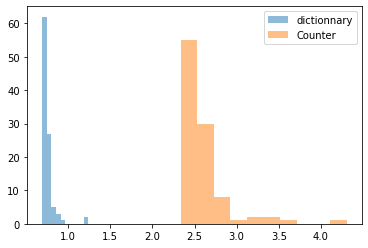

In [16]:
plt.figure()
plt.hist(distribution_dictionary, alpha=0.5, label='dictionnary')
plt.hist(distribution_counter, alpha=0.5, label='Counter')
plt.legend(loc='upper right')
plt.show()